In [68]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
import statsmodels as sm
import numpy as np  
import pylab 
import scipy.stats as stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Сезонные ARMA модели

$$SARMA(p,q,d)(P,Q,D)_S$$

Сезонная ARIMA = SARIMA

**Несезонные показатели**

p: порядок авторегрессии

d: порядок дифференцирования

q: порядок скользящего среднего

**Сезонные показатели**

P: порядок сезонной авторегрессии

D: порядок сезонного дифференцирования

Q: порядок сезонного скользящего среднего

S: количество временных шагов для одного цикла

The SARIMA model ${SARIMA}(0,0,0)(2, 0, 1)_7$

$$y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t$$

ARIMA(2, 0, 1) model: 

$$y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t$$

Сезонное дифференцирование $\Delta y_t = y_t - y_{t-S}$


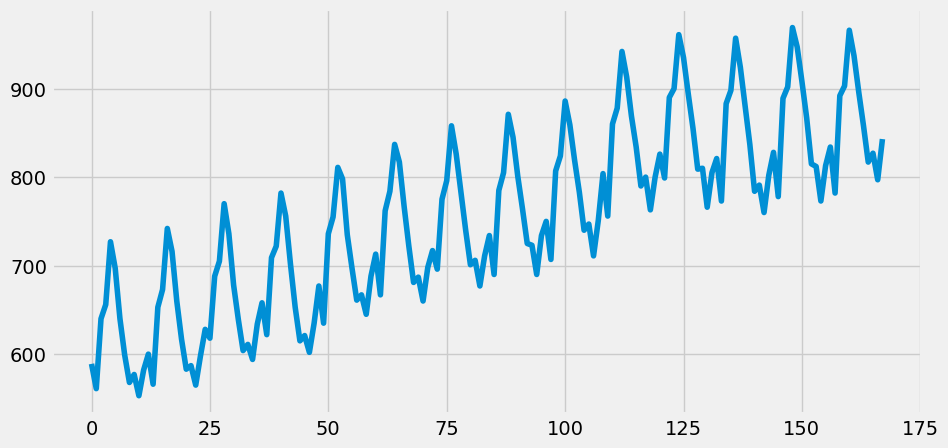

In [69]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
milk_production = pd.read_csv('milk_production.csv', header=0).drop(['Unnamed: 0'], axis = 1)
#milk_production = milk_production.asfreq('MS')
plt.plot(milk_production['Monthly milk production (pounds per cow)'])

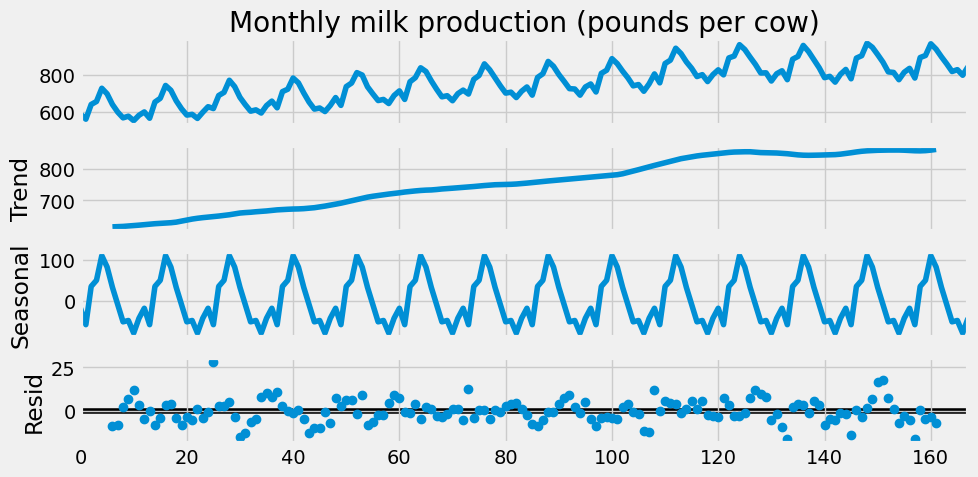

In [ ]:
decomp = seasonal_decompose(milk_production['Monthly milk production (pounds per cow)'], period=12)
# Plot decomposition
decomp.plot();
plt.tight_layout();

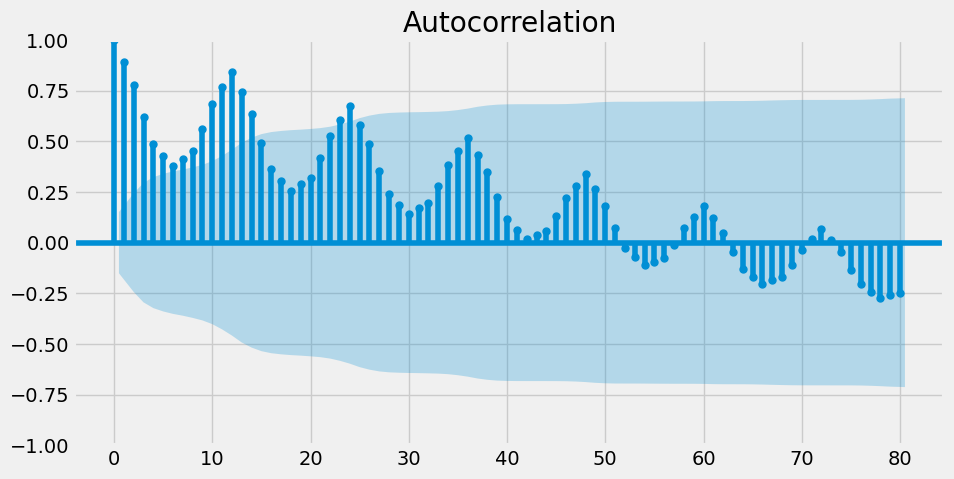

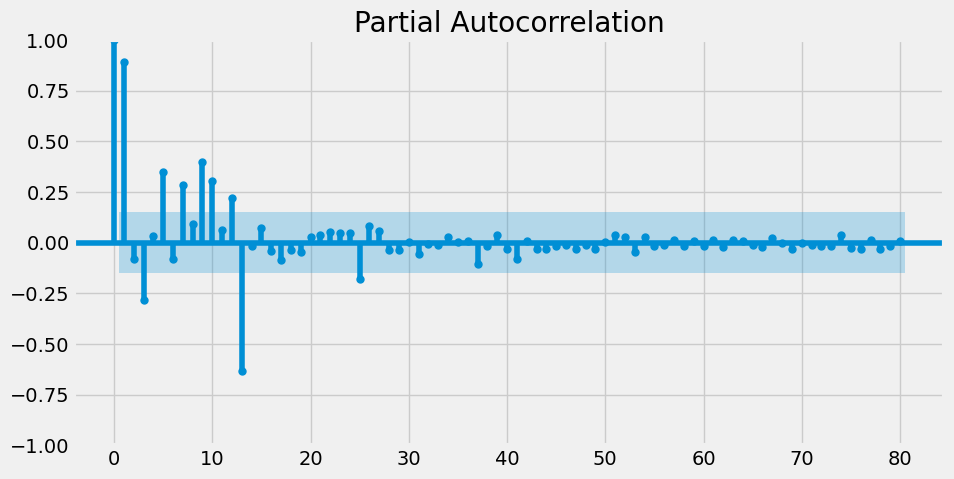

In [72]:
plot_acf(milk_production['Monthly milk production (pounds per cow)'], lags=80)
plot_pacf(milk_production['Monthly milk production (pounds per cow)'], lags=80)
plt.show()

In [73]:
df1 = pd.read_csv('df1.csv', index_col=0, parse_dates=True)
df2 = pd.read_csv('df2.csv', index_col=0, parse_dates=True)
df3 = pd.read_csv('df3.csv', index_col=0, parse_dates=True)
df1 = df1.asfreq('d')
df2 = df2.asfreq('d')
df3 = df3.asfreq('d')

In [74]:
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18319D+00    |proj g|=  2.54889D-02

At iterate    5    f=  6.18243D+00    |proj g|=  1.21912D-03

At iterate   10    f=  6.18216D+00    |proj g|=  1.93688D-02

At iterate   15    f=  6.18048D+00    |proj g|=  1.82979D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   1.858D-06   6.180D+00
  F =   6.1804755773871722     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [78]:
model = SARIMAX(milk_production['Monthly milk production (pounds per cow)'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21594D+00    |proj g|=  2.41439D-02

At iterate    5    f=  3.20099D+00    |proj g|=  3.63181D-03

At iterate   10    f=  3.20096D+00    |proj g|=  9.98596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   8.732D-06   3.201D+00
  F =   3.2009635803812646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:     Monthly milk production (pounds per cow)   No. Observations:                  168
Model:                      SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -537.762
Date:                                      Mon, 03 Mar 2025   AIC                           1083.524
Time:                                              14:45:00   BIC                           1095.697
Sample:                                                   0   HQIC                          1088.468
                                                      - 168                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1939      0.349     -0.555      0.579      -0.879       0.491
ma.L1         -0.0554      0.353     -0.157      0.875      -0.747       0.637
ar.S.L12      -0.4584      0.053     -8.636      0.000      -0.562      -0.354
sigma2        59.2859      4.616     12.843      0.000      50.238      68.334
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.64
Prob(H) (two-sided):                  0.98   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))
# Fit the model
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04719D+00    |proj g|=  2.07027D-01

At iterate    5    f=  7.00584D+00    |proj g|=  9.66903D-03

At iterate   10    f=  7.00445D+00    |proj g|=  9.64643D-05

At iterate   15    f=  7.00445D+00    |proj g|=  1.00508D-03

At iterate   20    f=  7.00430D+00    |proj g|=  6.54503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   2.815D-06   7.004D+00
  F =   7.0042448381900275     

CONVERG

 This problem is unconstrained.


In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Mon, 03 Mar 2025   AIC                           1130.679
Time:                                    14:45:46   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
Prob(Q):                              1.00   Prob(JB):                         0.62
Heteroskedasticity (H):               0.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22605D+00    |proj g|=  1.59793D-01

At iterate    5    f=  5.21376D+00    |proj g|=  3.92710D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   3.927D-05   5.214D+00
  F =   5.2137577141067197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [83]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.376
Date:                              Mon, 03 Mar 2025   AIC                           1048.752
Time:                                      14:46:19   BIC                           1056.149
Sample:                                  01-01-2013   HQIC                          1051.730
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
sigma2      9347.1462   1407.490      6.641      0.000    6588.516    1.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               0.77   Skew:                             0.02
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)12, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

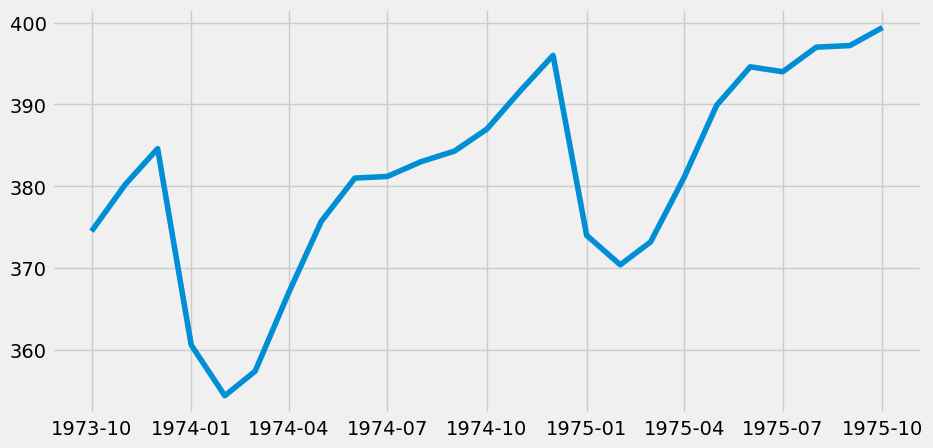

In [88]:
wisconsin_test = pd.read_csv('wisconsin_test.csv', index_col='date', parse_dates=True)
wisconsin_test = wisconsin_test.asfreq('MS')
dates = wisconsin_test.index
plt.plot(wisconsin_test)

In [85]:
model = SARIMAX(wisconsin_test, order=(3, 1, 2), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

arima_results = model.fit()

model = SARIMAX(wisconsin_test, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

sarima_results = model.fit()

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69198D+00    |proj g|=  7.29405D-01

At iterate    5    f=  3.27764D+00    |proj g|=  9.18876D-02

At iterate   10    f=  3.25292D+00    |proj g|=  6.47023D-02

At iterate   15    f=  3.19083D+00    |proj g|=  1.45053D-01

At iterate   20    f=  3.17783D+00    |proj g|=  1.62755D-02

At iterate   25    f=  3.16546D+00    |proj g|=  6.88092D-02

At iterate   30    f=  3.15457D+00    |proj g|=  3.43759D-02

At iterate   35    f=  3.14986D+00    |proj g|=  1.19616D-02

At iterate   40    f=  3.14883D+00    |proj g|=  9.52746D-03

At iterate   45    f=  3.14855D+00    |proj g|=  1.06058D-02

At iterate   50    f=  3.14843D+00    |proj g|=  1.61207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [86]:
arima_results.specification

{'seasonal_periods': 0,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (3, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'k_diff': 1,
 'k_seasonal_diff': 0,
 'k_ar': 3,
 'k_ma': 2,
 'k_seasonal_ar': 0,
 'k_seasonal_ma': 0,
 'k_ar_params': 3,
 'k_ma_params': 2,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

In [87]:
sarima_results.specification

{'seasonal_periods': 12,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (0, 1, 1),
 'seasonal_order': (1, 1, 1, 12),
 'k_diff': 1,
 'k_seasonal_diff': 1,
 'k_ar': 0,
 'k_ma': 1,
 'k_seasonal_ar': 12,
 'k_seasonal_ma': 12,
 'k_ar_params': 0,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

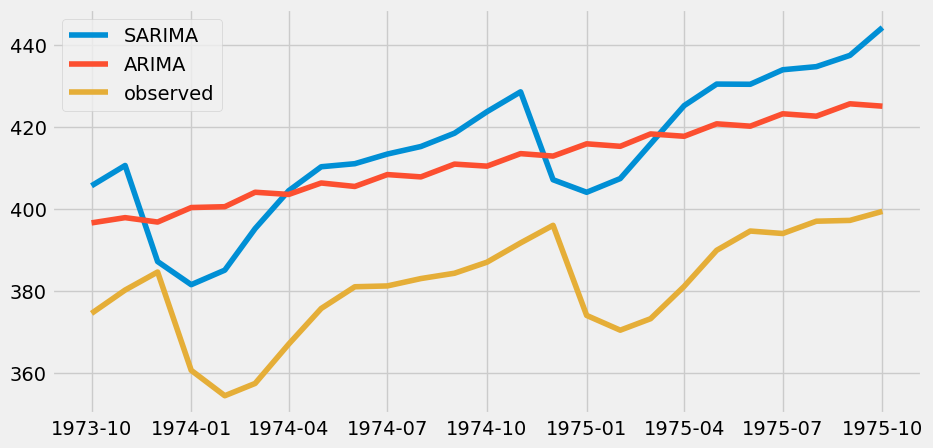

In [89]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

plt.plot(dates, sarima_mean, label='SARIMA');
plt.plot(dates, arima_mean, label='ARIMA');
plt.plot(wisconsin_test, label='observed');
plt.legend();

# Автоматический выбор моделей

In [90]:
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1,
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.433, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.434, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.218, Time=0.03 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.596, Time=0.00 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1125.048, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1119.909, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.791, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1120.954, Time=0.18 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1119.066, Time=0.16 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.294, Time=0.08 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.813, Time=0.25 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1120.054, Time=0.08 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1119.937, Time=0.14 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : 

In [91]:
model2 = pm.auto_arima(df2,
                       seasonal=False,
                       d=1,
                       trend='c',
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1153.963, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1130.992, Time=0.01 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 0.153 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(2, 1, 1)   Log Likelihood        

In [93]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1593.897, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1583.263, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1593.659, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1581.972, Time=0.01 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1575.886, Time=0.02 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[7] intercept   : AIC=1577.811, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,1,1)[7]          
Total fit time: 0.541 seconds
                                      SARIMAX Results                                      
Dep. Variable:            

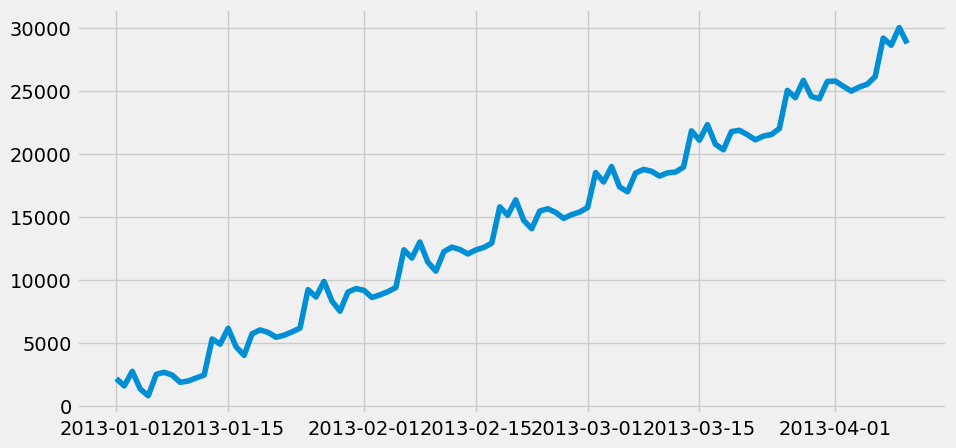

In [94]:
plt.plot(df3)

# Проверка модели

Проверим модель $\text{SARIMA}(1, 1, 1)(0, 1, 1)_{12}$

In [95]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)
co2 = co2.asfreq('MS')
co2
model = SARIMAX(co2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28254D-01    |proj g|=  9.42735D-01

At iterate    5    f=  2.74853D-01    |proj g|=  1.23752D-01

At iterate   10    f=  2.57951D-01    |proj g|=  2.42860D-01

At iterate   15    f=  2.48081D-01    |proj g|=  9.03678D-02

At iterate   20    f=  2.47816D-01    |proj g|=  2.10055D-01

At iterate   25    f=  2.47219D-01    |proj g|=  2.36836D-02

At iterate   30    f=  2.47206D-01    |proj g|=  4.89086D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     66      2     0     0   1.083D-03   2.472D-01
  F =  0.24720548505578516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Mon, 03 Mar 2025   AIC                            369.437
Time:                                    14:57:15   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.806      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.077      0.002       0.088       0.395
ma.L1         -0.6082      0.065     -9.303      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.509      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.750      0.000       0.085       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)
co2 = co2.asfreq('MS')
co2
model = pm.auto_arima(co2,seasonal=True, m=12,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=376.215, Time=0.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=844.086, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=589.307, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=375.959, Time=0.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=750.266, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=377.950, Time=0.58 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=571.256, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=374.226, Time=0.83 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=749.082, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=571.041, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=391.910, Time=0.46 sec
 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=369.437, Time=1.90 sec
 ARIMA(1,1,1)(0,1,0)[12] intercept   : AIC=751.042, Time=0.18 sec
 ARIMA(1,1,1)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Mon, 03 Mar 2025   AIC                            369.437
Time:                                    14:59:42   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.806      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.077      0.002       0.088       0.395
ma.L1         -0.6082      0.065     -9.303      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.509      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.750      0.000       0.085       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

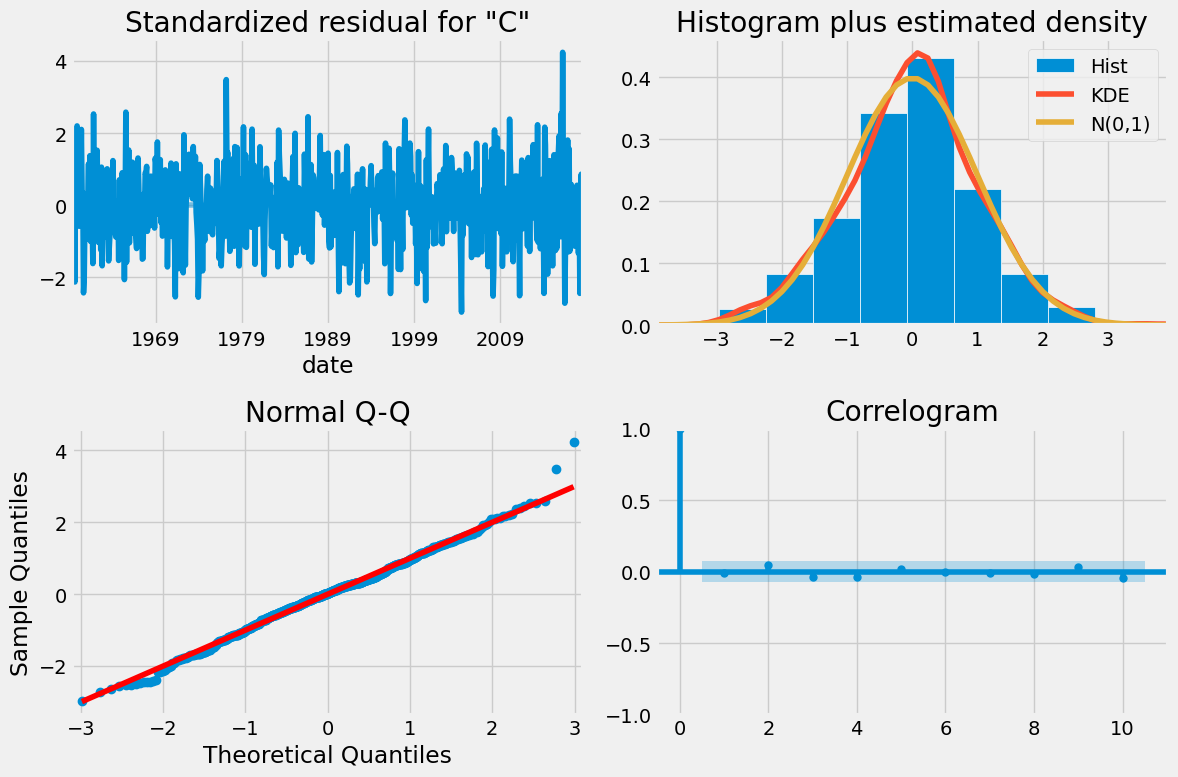

In [96]:
results.plot_diagnostics(figsize=(12, 8));
plt.tight_layout()

SARIMA forecast

In the previous exercise you confirmed that a SARIMA (1,1,1) x (0,1,1)12 model was a good fit to the CO2 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO2 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO2 time series up to the year 2030 to find the CO2 levels if we continue emitting as usual.

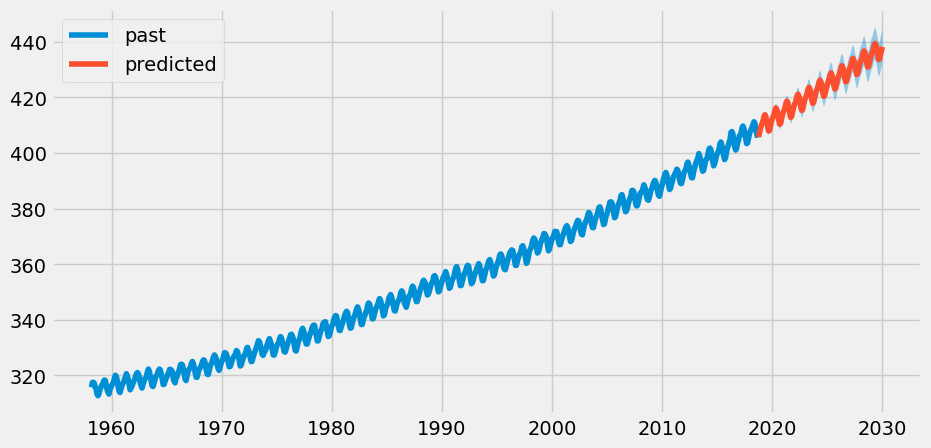

In [100]:
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

plt.plot(co2.index, co2, label='past');

plt.plot(dates, mean, label='predicted');

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'], conf_int.loc[:, 'upper CO2_ppm'], alpha=0.4)

plt.legend()
plt.show()

# Экспоненциальное сглаживание Хольта-Уинтерса

Пусть $y_t$ одномерный временной ряд. Экспоненциальным сглаживанием на период $t+h$, основываясь на знании значений процесса до момента времени $t$,называется построение прогноза по переменной $\widehat a_t$.
$$\widehat{y}_{t+h}=\widehat a_t$$                 
Переменная $\widehat a_t$ рекурсивно пересчитывается.
$$\widehat a_t= \alpha y_t+(1-\alpha)\widehat y_t=\alpha y_t+(1-\alpha)\widehat a_{t-1}$$ 
где $0 < \alpha <1$ называется параметром сглаживания. Начальное значение $\widehat a_1= y_1$. 
Эквивалентная запись модели прогнозирования называется error correction form:
$$\widehat a_t= \widehat a_{t-1}+\alpha (y_t-\widehat a_{t-1})=\widehat a_{t-1}+ \alpha (y_t- \widehat y_t) = \widehat a_{t-1} +\alpha \epsilon_t$$ 
Экспоненциальное сглаживание это частный случай метода Хольта-Уинтерса (Holt-Winters) для несезонных рядов без ярко выраженного тренда. Посмотрим пример прогнозирование ряда.

## Модель Хольта-Уинтерса с линейным трендом

Очевидным обобщением метода является добавление тренда, начнем с линейного. Модель для прогнозирования будет теперь такой
$$\widehat{y}_{t+h}=\widehat a_t+h\widehat b_t$$
где пересчет параметров $\widehat a_t,\widehat b_t$ идет уже по следующим формулам
$$\widehat a_t = \alpha y_t+(1-\alpha)(\widehat a_{t-1}+\widehat b_{t-1})$$
$$\widehat b_t = \beta (\widehat a_t- \widehat a_{t-1})+(1-\beta)\widehat b_{t-1}$$

## Cезонный метод Хольта-Уинтерса

Дальнейшее расширение метода это добавление аддитивной или мультипликативной сезонной компоненты с периодом сезонности $p$.

### Аддитивная сезонная компонента

Модель будет теперь следующего вида.
$$\widehat{y}_{t+h}=\widehat a_t+h\widehat b_t+ \widehat s_t$$
где пересчет параметров $\widehat a_t,\widehat b_t,\widehat s_t$ идет уже по следующим формулам
$$\widehat a_t = \alpha (y_t-\widehat s_{t-p})+(1-\alpha)(\widehat a_{t-1}+\widehat b_{t-1})$$
$$\widehat b_t = \beta (\widehat a_t- \widehat a_{t-1})+(1-\beta)\widehat b_{t-1}$$
$$\widehat s_t = \gamma (y_t-\widehat a_t)+(1-\gamma)\widehat s_{t-p}$$

In [101]:
# holt winters 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

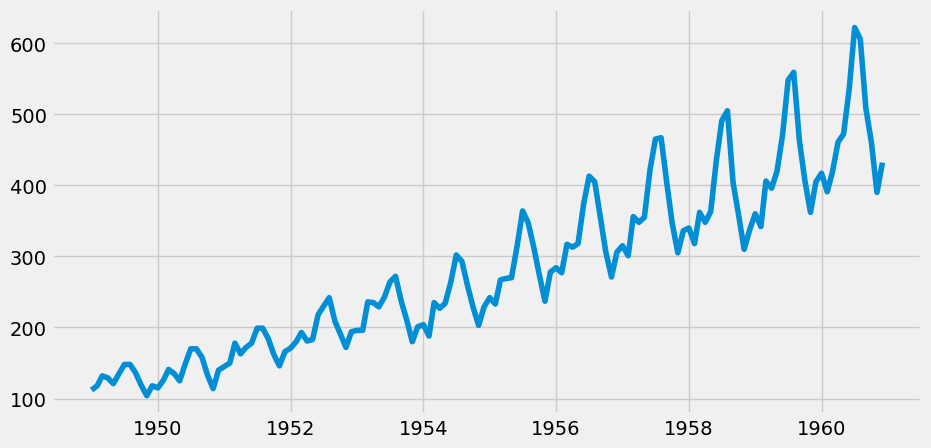

In [103]:
airline = pd.read_csv('airline-passengers.csv',index_col='Month', parse_dates=True)
airline
airline.dropna(inplace=True)
plt.plot(airline)

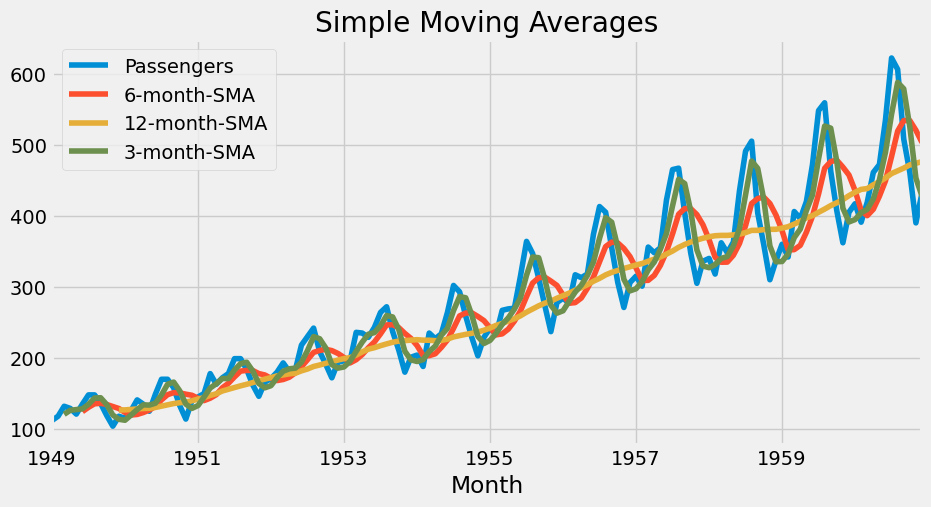

In [105]:
airline['6-month-SMA'] = airline['Passengers'].rolling(window=6).mean()
airline['3-month-SMA'] = airline['Passengers'].rolling(window=3).mean()
airline.plot(title='Simple Moving Averages');

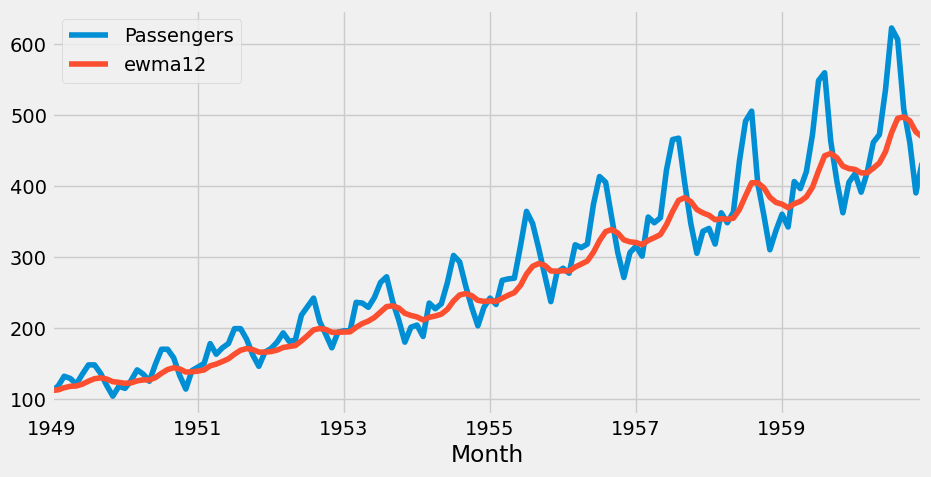

In [106]:
airline['ewma12'] = airline['Passengers'].ewm(span=12,adjust=False).mean()
airline[['Passengers','ewma12']].plot();

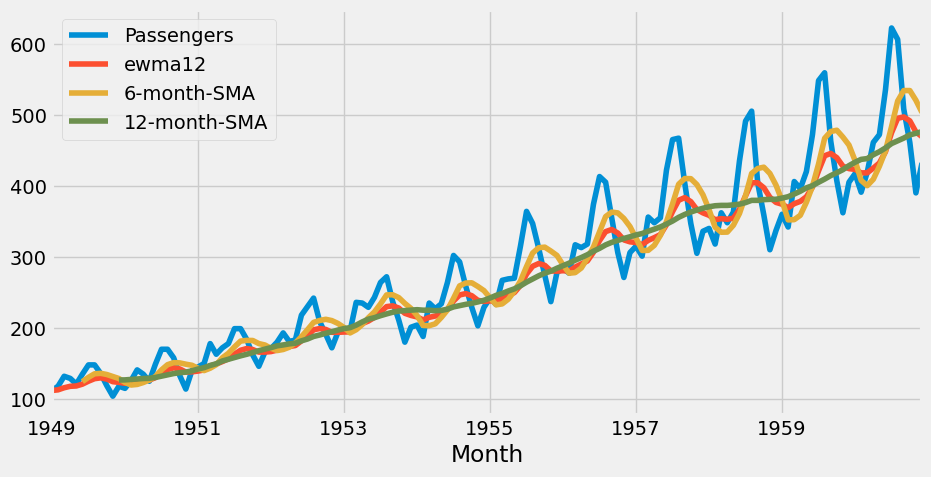

In [107]:
airline[['Passengers','ewma12','6-month-SMA','12-month-SMA']].plot();

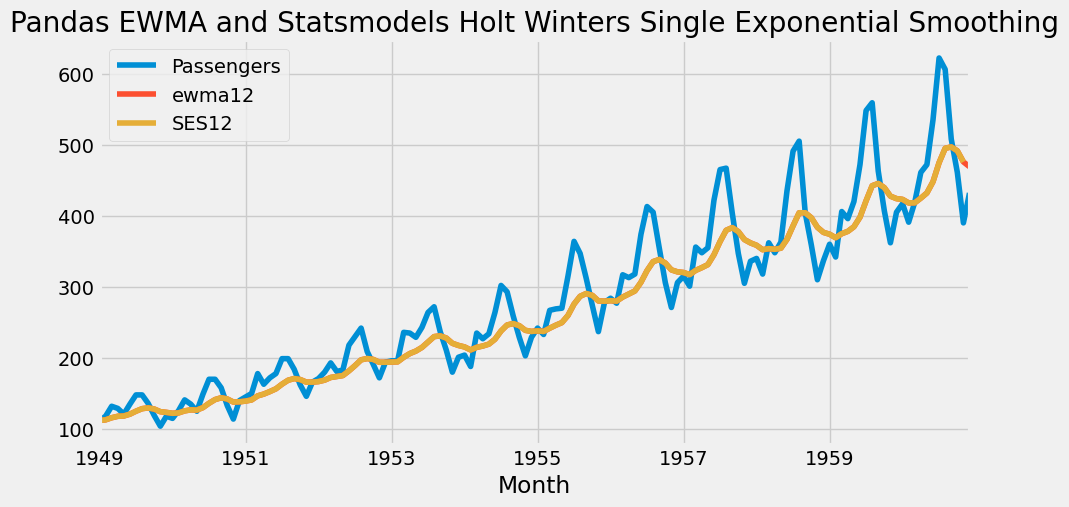

In [108]:
span = 12
alpha = 2/(span+1)
airline.index.freq = 'MS' 
airline['SES12'] = SimpleExpSmoothing(airline['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline[['Passengers','ewma12','SES12']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');

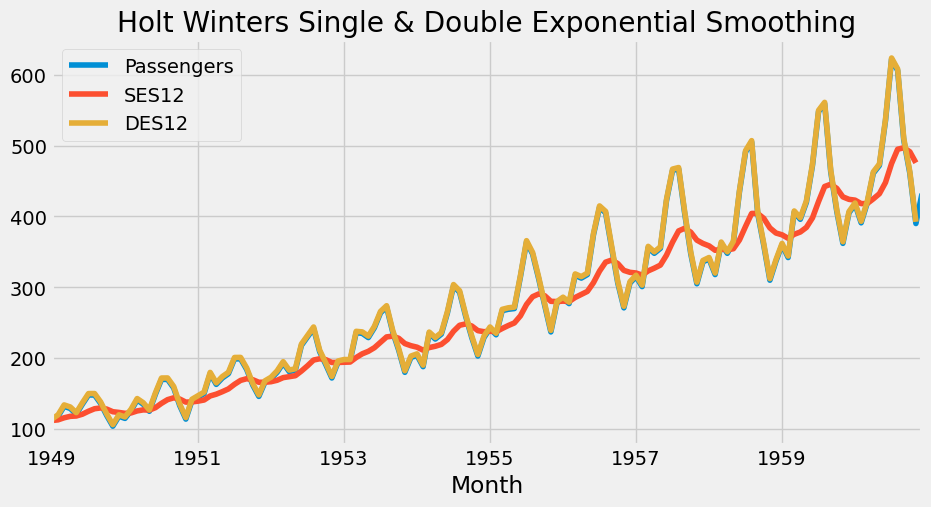

In [109]:
airline['DES12'] = ExponentialSmoothing(airline['Passengers'],trend='add').fit().fittedvalues.shift(-1)
airline[['Passengers','SES12','DES12']].plot(title='Holt Winters Single & Double Exponential Smoothing');

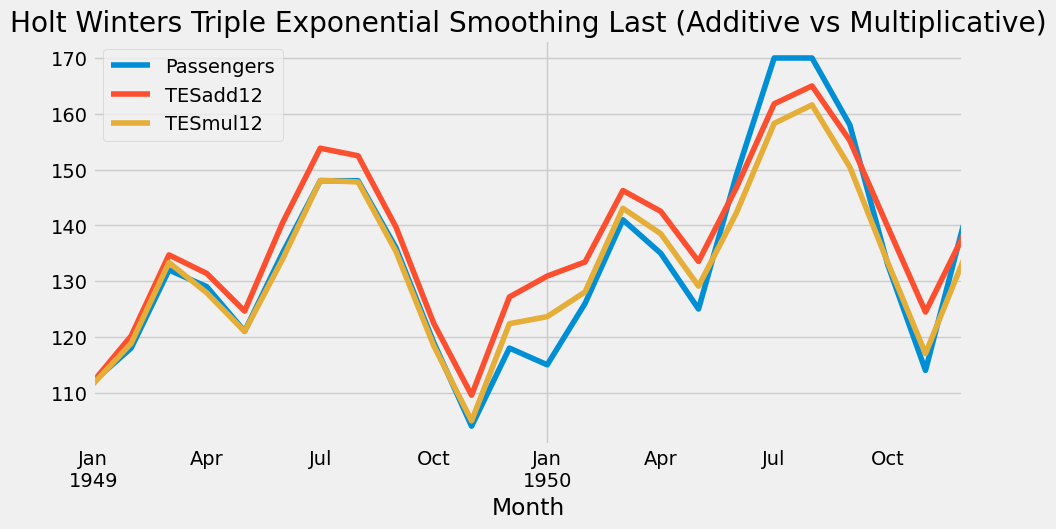

In [110]:
airline['TESadd12'] = ExponentialSmoothing(airline['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['TESmul12'] = ExponentialSmoothing(airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(title='Holt Winters Triple Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

# Прогнозирование с помощью Хольта-Уинтерса

In [111]:
airline  = pd.read_csv('airline-passengers.csv',index_col='Month',parse_dates=True)
airline.index.freq = 'MS'
train_airline = airline[:108] 
test_airline = airline[108:] 

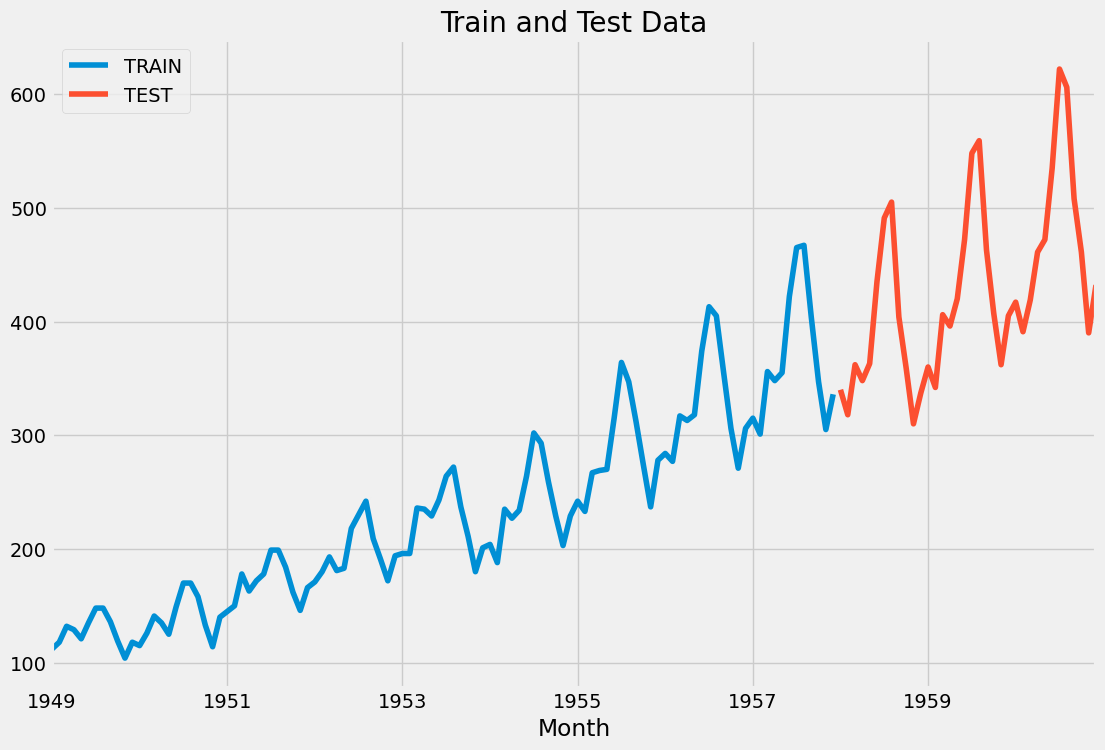

In [112]:
fitted_model = ExponentialSmoothing(train_airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')
train_airline['Passengers'].plot(legend=True,label='TRAIN')
test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

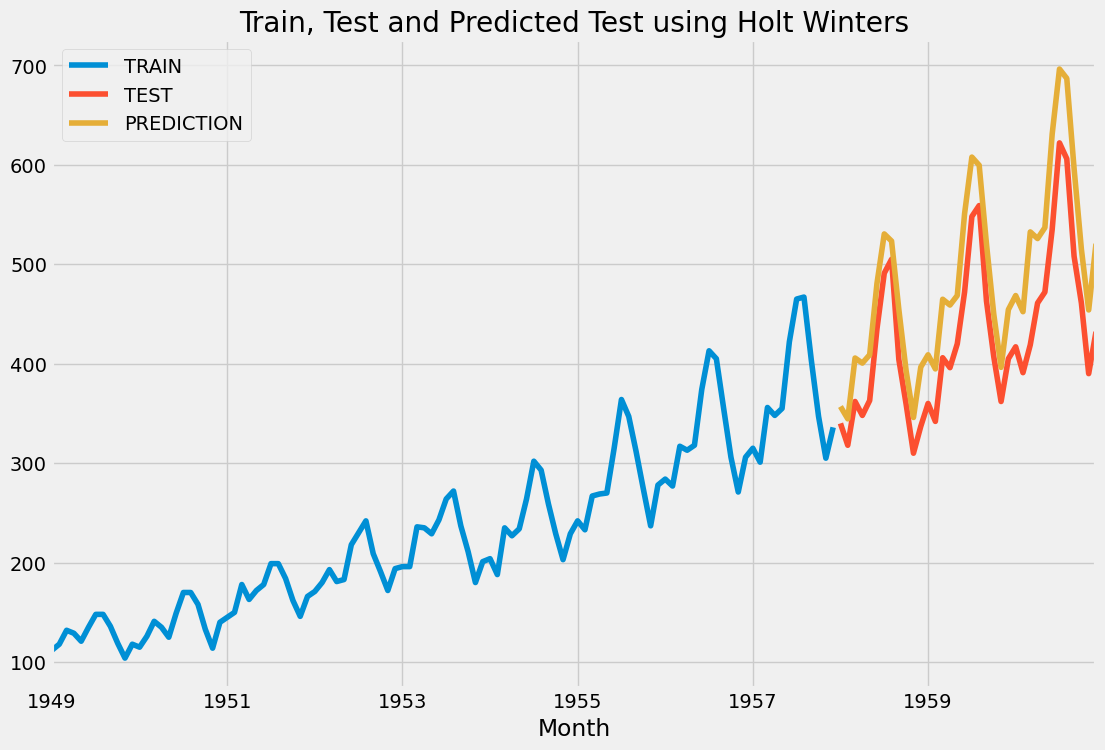

In [113]:
train_airline['Passengers'].plot(legend=True,label='TRAIN')
test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

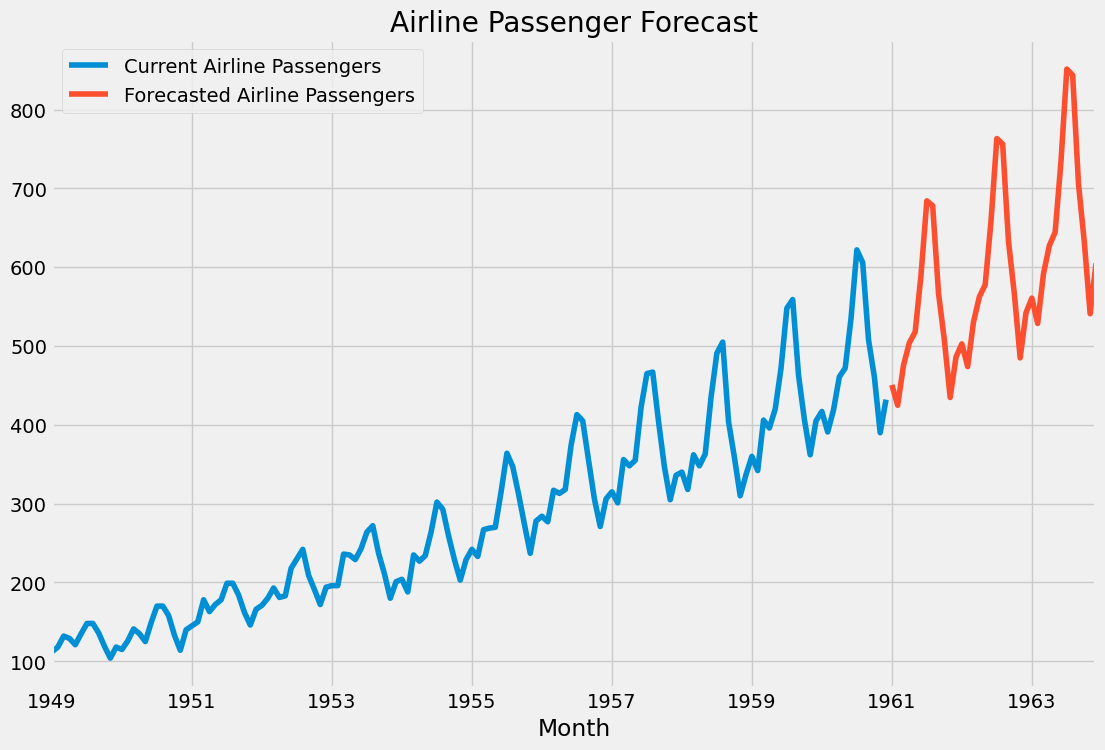

In [114]:
final_model = ExponentialSmoothing(airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(steps=36)
airline['Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast');

# Модели временных рядов с гетероскедастичностью

## ARCH модель

Пусть нам дан временной ряд, удовлетворяющий модели авторегрессии порядка $p$ 
$$x_{t}=c+\phi_1x_{t-1}+...+\phi_{p}x_{t-p}+u_{t}$$
где $u_{t}$-белый шум
$$Eu_{t} = 0$$
$$Eu_{t}u_{s} = σ^2$$ 
при $s=t$ иначе 0

    
Оптимальным линейным прогнозом такого ряда является условное математическое ожидание $x_{t}$ при условии, что нам известна история процесса до момента $t-1$ включительно
$$E[x_{t}|x_{t-1},x_{t-2,....}]=c+\phi_1x_{t-1}+...+\phi_{p}x_{t-p}~~~(1)$$                

Если предположить стационарность процесса $x_{t}$ то безусловное математическое ожидание процесса не зависит от времени и равно
$$E[x_{t}] = c+\phi_1E[x_{t-1}]+...+\phi_{p}E[x_{t-p}]= c+\phi_1E[x_{t}]+...+\phi_{p}E[x_{t}]$$
Отсюда

$$E[x_{t}]=(с/(1-\phi_1-...-\phi_{p}))$$

Однако из выражения (1) видно, что условное математическое ожидание от времени зависит.
    
На практике довольно часто встречается необходимость прогнозирования не только средних значений, но и дисперсии.
Предположим, что и сам процесс шума $u_{t}$(точнее его квадрат) в свою очередь следует процессу авторегрессии поряда $m$

$$u_{t}^2=\eta+\alpha_1u_{t-1}^2+...+\alpha_m u_{t-m}^2+v_{t}~~~(2)$$             
Где $v_{t}$- процесс белого (но уже другого) шума
$$Ev_{t} = 0$$
$$Ev_{t}v_{s} = \lambda^2$$  
при $s=t$ иначе 0

При прогнозировании ряда $x_{t}$ мы показали, что $u_{t}$- ошибка прогнозирования. Из представления (2) следует, что оптимальным линейным прогнозом $u_{t}^2$ будет в свою очередь следующее условное математическое ожидание.
$$E[u^2_{t}|u_{t-1}^2,u^2_{t-2},....]=\eta+\alpha_1u^2_{t-1}+...+\alpha_{m}u^2_{t-m}~~~(3)$$     
Определение. Процесс белого шума, удовлетворяющий (2) называют авторегрессионным гетероскедастическим процессом порядка m. Обозначают это следующим образом $u_{t}\sim ARCH(m)$. Такой класс процессов впервые был предложен Engle в 1982 году. В 2003 году вклад Engle был отмечен Нобелевской премией по экономике.
Так как процесс $u_{t}$ - случайный, a квадрат его $u_{t}^2$ естественно должен быть всегда неотрицательным, то от представления (2) естественно потребовать, что при любых реализациях $u_{t}$ -  его квадрат был всегда нетрицательным. Этого можно добится следеющими предположениями
    1. Процесс $v_{t}$ ограничен снизу $-\eta$, где $\eta>0$
    2. Все $\alpha_{i}>0;i=1,...,m$
Естественно также предполагать стационарность процесса $u_{t}^2$. Это достигается предположением, что корни соответсвующего характеристического уравнения многочлена
$$1-\alpha_1z-...-\alpha_{m}z^{m}=0$$
должны лежать вне единичного круга $|z|≤1$
    
Это предположение, а вместе с предположением 2. эквивалентны тому, что
$$\alpha_1+...+\alpha_{m}<1$$ 

    
При выполнении всех выше сделанных предположений безусловную дисперсию процесса $u_{t}$ можно вычислить по следующей формуле
$$Eu_{t}^2=(\eta/(1-(\alpha_1+...+\alpha_{m})))$$
Существует альтернативное и более удобное представление ARCH(m). Предположим, что

$$u_{t}=e_{t}\sqrt(h_{t})~~~(4)$$               

где $e_{t}$
-последовательность независимых одинаково распределенных случайных величин с нулевым математическим ожиданием и единичной дисперсией

$$E[e_{t}] = 0$$ 
$$D[e_{t}] = 1$$

а $h(t)$ удовлетворяют соотношению
$$h_{t}=\eta+\alpha_1u^2_{t-1}+...+\alpha_{m}u^2_{t-m}~~~(5)$$         
Из соотношения (4) следует, что
$$E[u_{t}^2|u_{t-1},u_{t-2},...]=\eta+\alpha_1u^2_{t-1}+...+\alpha_{m}u^2_{t-m}$$

    
следовательно $u_{t}\sim ARCH(m)$


### Оценивание параметров ARCH модели

Предположим, что у нас есть линейная регрессионная модель с шумом, который в свою очередь предствляется в виде ARCH процеса.$$y_{t}=x_{t}^{T}\beta+u_{t}$$

где $x_{t }$-вектор из независимых (предикторов) переменных, среди которых могут быть и так называемые лаговые переменные от  $y_{t}$, например $y_{t-1},y_{t-2}$ и т.д. А $u_{t}$ удовлетворяет соотношениям (4) и (5).
    Удобно занумеровать значения имеющихся ряда наблюдений $y_{t}$ индексами, начиная с $t=-m+1,-m+2,...,0,1, ...,T$.   Первые $m$ значенией мы будем использовать для построения условного распредения, а значения  с индексами от 1 до $Т$ непосредстевнно для оценивания. Таким образом для произвольного момента времени $t$ обозначим через $Y_{t}$ следующий вектор
    $$Y_{t}=(y_{t},y_{t-1},...,y_0,...,y_{-m+1},x_{t}^{T},x_{t-1},...,x^{T}_0,...,x_{-m+1}^{T}$$

Пусть $e_{t}$- последовательность независимых стандартно нормально распределенных случайных величин независимых одновременно от $x_{t}$ и от $Y_{t-1}$. Тогда, при сделанных выше предположениях условное распределение $y_{t}$ при условии, что $x_{t}$ и $Y_{t-1}$ известно будет нормальным с математическим ожиданием $x_{t}^{T}\beta$  и дисперсией $h_{t}$
$$f(y_{t}|x_{t},Y_{t-1})=(1/(\sqrt{(2\pi h_{t}})))exp(-(((y_{t}-x_{t}^{T}\beta)^2)/(2h_{t})))$$
где
$$h_{t}=\mu+\alpha_1(y_{t-1}-x_{t-1}^{T}\beta)^2+...+\alpha_{m}(y_{t-m}-x_{t-m}^{T}\beta)^2  ~~~(8)$$    
Запишем (8) в виде cкалярного произведения двух векторов
$$=[z_{t}(\beta)]^{T}\delta$$
где
$$\delta=(\mu,\alpha_1,...,\alpha_{m})^{T}$$

а
$$[z_{t}(\beta)]^{T}=[1,(y_{t-1}-x_{t-1}^{T}\beta)^2,...,(y_{t-m}-x_{t-m}^{T}\beta)^2]$$

    
Обозначим через $\theta$ вектор параметров подлежащих оценке. Это будет вектор вида

$$\theta=[\beta^{T},\delta^{T}]$$

Тогда логарифм условной относительно первых m наблюдений функции правдоподобия запишется следующим образом
$$L(\theta) = \sum_{t=1}^{T}ln(f(y_{t}|x_{t},Y_{t-1};\theta))=
	  -(T/2)ln(2\pi)-(1/2)\sum_{t=1}^{T}ln h_{t}-(1/2)\sum_{t=1}^{T}(((t_{t}-x_{t}^{T}\beta)^2)/(h_{t}))$$
Для получения оценок максимального правдоподобия чаше всего используют какой-нибудь градиентный метод.

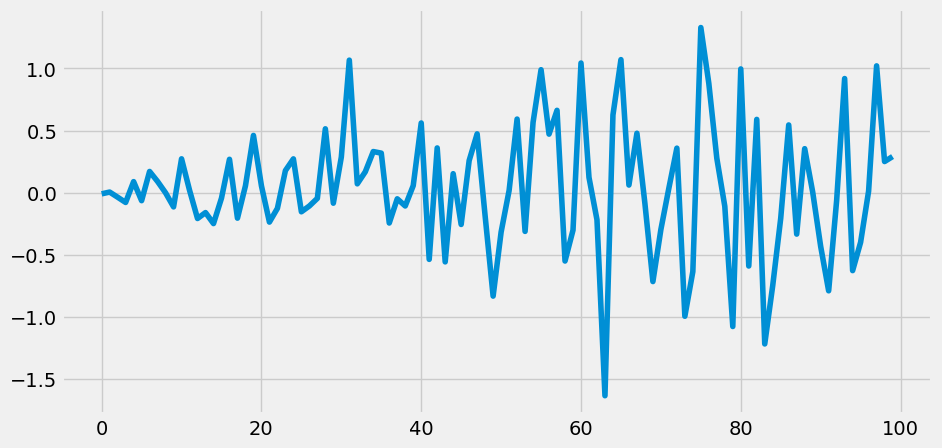

In [115]:
data = np.array([np.random.normal(0, i*0.01) for i in range(1,100+1)])
plt.plot(data)
plt.show()

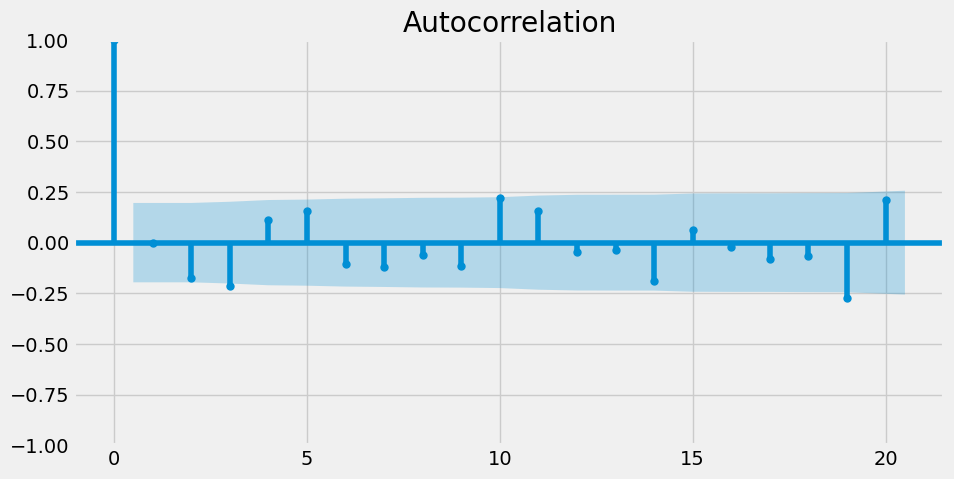

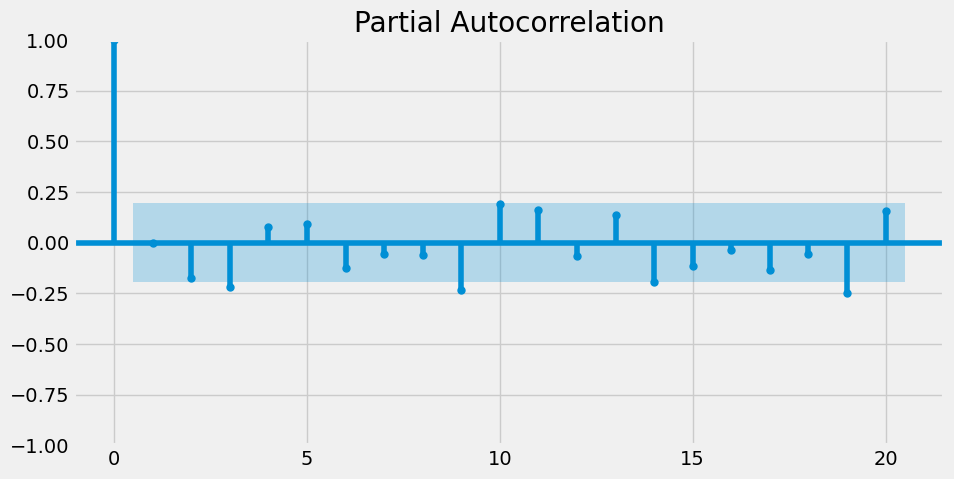

In [117]:
plot_acf(data)
plot_pacf(data)
plt.show()

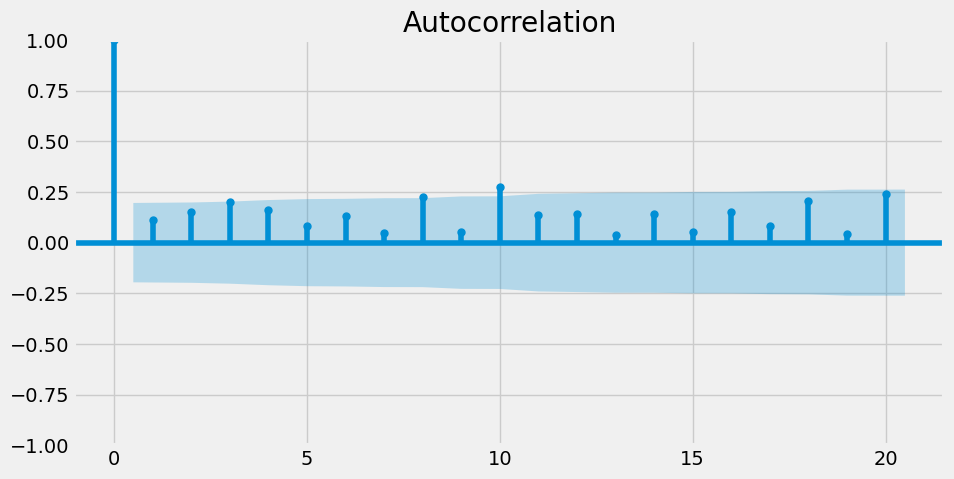

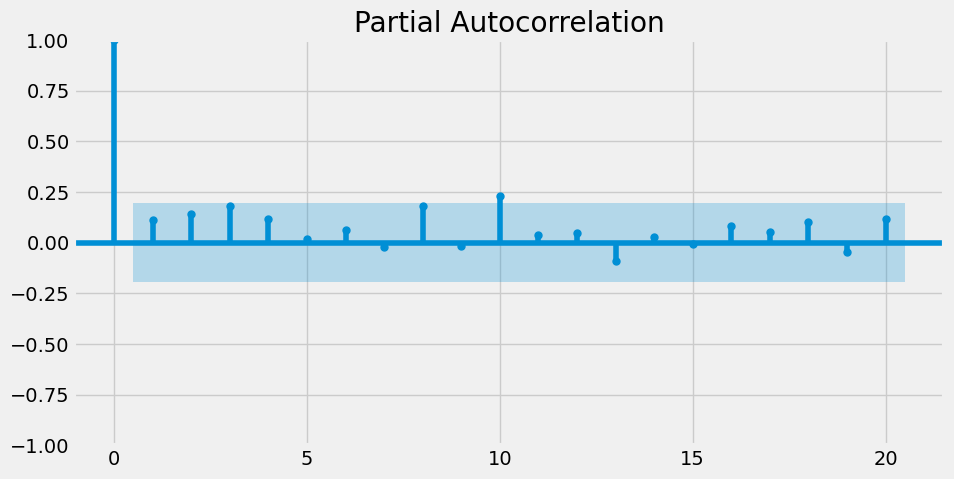

In [119]:
squared_data = data**2
plot_acf(squared_data)
plot_pacf(squared_data)
plt.show()

In [134]:
from arch import arch_model
n_test = 10
train, test = data[:-n_test], data[-n_test:]
model = arch_model(train, mean='Zero', vol='ARCH', p=6)
model_fit = model.fit()
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:      9,   Neg. LLF: 133.71867272657508
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1675.9614539693837
Iteration:      3,   Func. Count:     29,   Neg. LLF: 385.4488622361223
Iteration:      4,   Func. Count:     38,   Neg. LLF: 83.7103375295684
Iteration:      5,   Func. Count:     47,   Neg. LLF: 59.776842483962476
Iteration:      6,   Func. Count:     56,   Neg. LLF: 67.55819419546832
Iteration:      7,   Func. Count:     65,   Neg. LLF: 55.323817681134344
Iteration:      8,   Func. Count:     74,   Neg. LLF: 53.411527230351965
Iteration:      9,   Func. Count:     83,   Neg. LLF: 53.64078432882697
Iteration:     10,   Func. Count:     92,   Neg. LLF: 51.59980274281603
Iteration:     11,   Func. Count:    101,   Neg. LLF: 51.33794263204731
Iteration:     12,   Func. Count:    109,   Neg. LLF: 51.28901692284558
Iteration:     13,   Func. Count:    117,   Neg. LLF: 51.28441423402094
Iteration:     14,   Func. Count:    125,   Neg. LLF: 51.283

In [135]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                       ARCH   Log-Likelihood:               -51.2839
Distribution:                  Normal   AIC:                           116.568
Method:            Maximum Likelihood   BIC:                           134.067
                                        No. Observations:                   90
Date:                Mon, Mar 03 2025   Df Residuals:                       90
Time:                        15:26:07   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0255  1.727e-02      1.479      0.139 [-8.308e-03,5.939e-02]
alpha[1]       0.0763  9.083e-02      0.840      0.401      [ -0.102,  0.254]
alpha[2]       0.0858  9.266e-02      0.926      0.354   [-9.576e-02,  0.267]
alpha[3]       0.4155      0.182      2.283  2.243e-02    [5.879e-02,  0.772]
alpha[4]       0.0477  7.701e-02      0.620      0.535      [ -0.103,  0.199]
alpha[5]       0.0752      0.110      0.687      0.492      [ -0.139,  0.290]
alpha[6]       0.2994      0.234      1.278      0.201      [ -0.160,  0.758]
=============================================================================

Covariance estimator: robust
"""

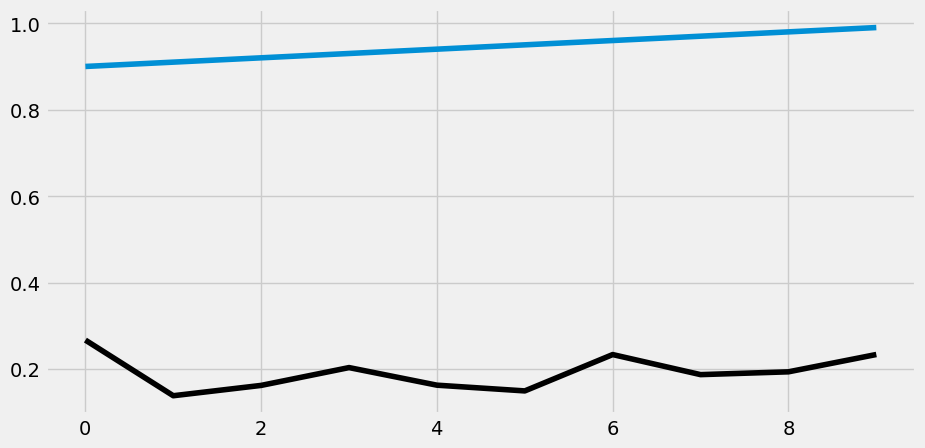

In [138]:
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
plt.plot(yhat.variance.values[-1, :], c = 'black')# plot forecast variance
plt.show()

In [137]:
model = pm.auto_arima(data,seasonal=False,
                      start_p=1, start_q=1,
                      max_p=20, max_q=20,
                      max_P=20, max_Q=20,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=158.468, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=154.587, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=156.584, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=156.583, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=156.059, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.031 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                 -76.294
Date:                Mon, 03 Mar 2025   AIC                            154.587
Time:                        15:27:00   BIC                            157.192
Sample:                             0   HQIC                           155.642
                                - 100                                         
Co

In [139]:
model = pm.auto_arima(data,seasonal=True,
                      start_p=1, start_q=1,
                      max_p=20, max_q=20,
                      max_P=20, max_Q=20,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=159.961, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=156.059, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=158.059, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=158.059, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=154.587, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.058 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                 -76.294
Date:                Mon, 03 Mar 2025   AIC                            154.587
Time:                        15:28:27   BIC                            157.192
Sample:                             0   HQIC                           155.642
                                - 100                                         
Co

## GARCH модель

В предыдущем разделе  $h(t)$ удовлетворяло соотношению
$$h_{t}=\mu+\alpha_1u^2_{t-1}+...+\alpha_{m}u^2_{t-m}$$

Более общим будет процесс в котором условная дисперсия зависит  не от конечного, а бесконечного числа задержек $u^2_{t-j},   j=1,2,...$
В операторном виде это можно записать так.
$$h_{t} = \mu+\pi(B)u_{t}^2        (1)$$
$$\pi(B)  = \sum_{j=1}^{\infty}\pi_{j}B^{j}$$

Эта идея реализуется, когда $\pi(B)$ представим в виде отношения двух конечных полиномов
$$\pi(B)=((\alpha(B))/(1-\delta(B)))=((\alpha_1B+...+\alpha_{m}B^{m})/(1-\delta_1B-...-\delta_{r}B^{r}))$$
здесь мы предположим, что корни $1-\delta(B)$ лежат вне единичного круга $|B|≤1$

Умножив обе части (1) на $1-\delta(B)$ получим
$$[1-\delta(B)]h_{t}=[1-\delta(B)]\mu+\alpha(B)u_{t}^2$$
или
$$h_{t} = κ+\delta_1h_{t-1}+...+\delta_{r}h_{t-r}+\alpha_1u_{t-1}^2+...+\alpha_{m}u_{t-m}^2      (2)$$
где $κ = [1-\delta_1-...-\delta_{r}]\mu$

Соотношения (2) и называют процессом обобщенной условной авторегрессии с гетероскедастичностью. (GARCH(r,m) - модель). Модель впервые была предложена Bollerslev в 1986 году.

Неотрицательность для $u_{t}^2$ обеспечивается предположением, что $κ≥0,\alpha_{i}≥0,\delta_{i}≥0;  i=1,...,p=max(r,m)$. Здесь мы доопределили нулями недостающие либо $\alpha_{i}$  либо $\delta_{i}$. Cтационарность гарантируется тем, корни характеристического моногочлена вида
$$1+(\alpha_1+\delta_1)z+...+(\alpha_{p}+\delta_{p})z^{p}=0 $$
лежат вне единичного круга $|z|≤1$
    
Совместно с предположением о нетрицательности $\alpha_{i}$ и $\delta_{i}$ предположение о стационарности эквивалентно тому, что
$$(\alpha_1+\delta_1)+...+(\alpha_{p}+\delta_{p})<1 $$

При сделанных предположениях безусловное математическое ожидание для $u_{t}^2$ будет равно
$$Eu_{t}^2=(κ/(1-((\alpha_1+\delta_1)+...+(\alpha_{p}+\delta_{p}))))$$



### Прогнозирование GARCH моделей

Прогнозирование рассмотрим на примере модели AR(1) GARCH(1,1).

$$x_t=\phi_1x_{t-1}+\theta_1\sigma_{t-1}\epsilon_{t-1}+\sigma_t\epsilon_t$$
$$\sigma_t^2= \omega+\alpha a_t^2+ \beta \sigma^2_{t-1}$$
$$a_t=\sigma_t\epsilon_t; \epsilon_t\sim N(0,1)$$

Обозначим для момента времени  $t$ прогноз на  $l$ моментов времени вперед $\widetilde{x}_t(l)$. 
Как и в ARMA моделях условное математическое ожидание будет минимальным в среднеквадратичном прогнозом  
$$\widetilde x_t(l) = E(x_{t+l}|x_1,x_2,...,x_t)=\phi_1\widetilde x_{t}(l-1)$$
где $\widetilde x_t(k) = E(x_{t+k}|x_1,x_2,...,x_t)$ if $k>0$

и

$\widetilde x_t(k) = x_{t+k}$ для $k\le 0$.

Пусть $\widetilde \sigma_t^2(l)$ прогноз квадрата волатильности в момент времени  $t$ на  $l$ моментов вперед.
$$\widetilde \sigma_t^2(l) = E(\sigma^2_{t+l}|\sigma^2_1,\sigma^2,...,\sigma^2_t)=\alpha\widetilde a^2_{t}(l-1)+\beta\widetilde \sigma^2_{t}(l-1)$$
где

$\widetilde a^2_t(k) = 0$ if $k>0$;

иначе

$\widetilde a^2_t(k) = x_{t+k}-\widetilde x_{t}(k)$ if $k \le 0$.

Обратим внимание, что прогноз самого ряда $x_t$ точно такой же, как если бы у нас просто была модель AR(1). GARCH отражается только на доверительных интервалах прогноза

In [149]:
a

[[1, 1, 85.74732121526118],
 [1, 2, 81.71293124877673],
 [1, 3, 83.71289888556153],
 [1, 4, 85.5390991930142],
 [1, 5, 87.53909987419576],
 [1, 6, 89.539099774087],
 [1, 7, 91.53909911971274],
 [1, 8, 93.53909925538647],
 [1, 9, 95.53909921162555],
 [1, 10, 97.53909915971947],
 [1, 11, 99.53909947721293],
 [1, 12, 101.53909913401375],
 [1, 13, 103.53909987140162],
 [1, 14, 105.53909965085184],
 [1, 15, 107.53910303688147],
 [2, 1, 87.74733483487067],
 [2, 2, 83.7129366192049],
 [2, 3, 85.71293599964704],
 [2, 4, 87.48118003910619],
 [2, 5, 89.48117509865918],
 [2, 6, 91.48118011167426],
 [2, 7, 93.48118033918391],
 [2, 8, 95.48118003040825],
 [2, 9, 97.48118005127336],
 [2, 10, 99.48118001621211],
 [2, 11, 101.48118066834877],
 [2, 12, 103.4811800149184],
 [2, 13, 105.48118076236536],
 [2, 14, 107.48118030955756],
 [2, 15, 109.4811808863465],
 [3, 1, 89.74728909955844],
 [3, 2, 85.71292365002715],
 [3, 3, 87.71292949919743],
 [3, 4, 88.88084888202532],
 [3, 5, 90.88084934818073],
 [3, 

In [148]:
a = []
for p1 in range(1,16):
    for q1 in range(1,16):
        model = arch_model(train, mean='Zero', vol='GARCH', p=p1, q=q1)
        model_fit = model.fit()
        a += [[p1,q1,model_fit.aic]]

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1290.6245891288872
Iteration:      2,   Func. Count:     10,   Neg. LLF: 41.78841820793538
Iteration:      3,   Func. Count:     14,   Neg. LLF: 52.54463454194271
Iteration:      4,   Func. Count:     19,   Neg. LLF: 163.94797487348265
Iteration:      5,   Func. Count:     24,   Neg. LLF: 39.91051825418182
Iteration:      6,   Func. Count:     28,   Neg. LLF: 39.87766994452241
Iteration:      7,   Func. Count:     32,   Neg. LLF: 39.87404333984684
Iteration:      8,   Func. Count:     36,   Neg. LLF: 39.87367002293394
Iteration:      9,   Func. Count:     40,   Neg. LLF: 39.873662377949415
Iteration:     10,   Func. Count:     44,   Neg. LLF: 39.8736606076306
Iteration:     11,   Func. Count:     48,   Neg. LLF: 40.187236731852096
Optimization terminated successfully    (Exit mode 0)
            Current function value: 39.87366060763059
            Iterations: 12
            Function evaluations: 57
            Gradient evaluations:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1412.4430154566815
Iteration:      2,   Func. Count:     12,   Neg. LLF: 38.838222457333394
Iteration:      3,   Func. Count:     17,   Neg. LLF: 37.449329056127816
Iteration:      4,   Func. Count:     22,   Neg. LLF: 37.27590117965735
Iteration:      5,   Func. Count:     27,   Neg. LLF: 37.04943922852443
Iteration:      6,   Func. Count:     32,   Neg. LLF: 37.000228187498465
Iteration:      7,   Func. Count:     38,   Neg. LLF: 36.85743614386281
Iteration:      8,   Func. Count:     43,   Neg. LLF: 36.85645979541824
Iteration:      9,   Func. Count:     48,   Neg. LLF: 36.85646562641854
Iteration:     10,   Func. Count:     53,   Neg. LLF: 38.787060414536995
Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.85646562438836
            Iterations: 11
            Function evaluations: 58
            Gradient evaluations: 10


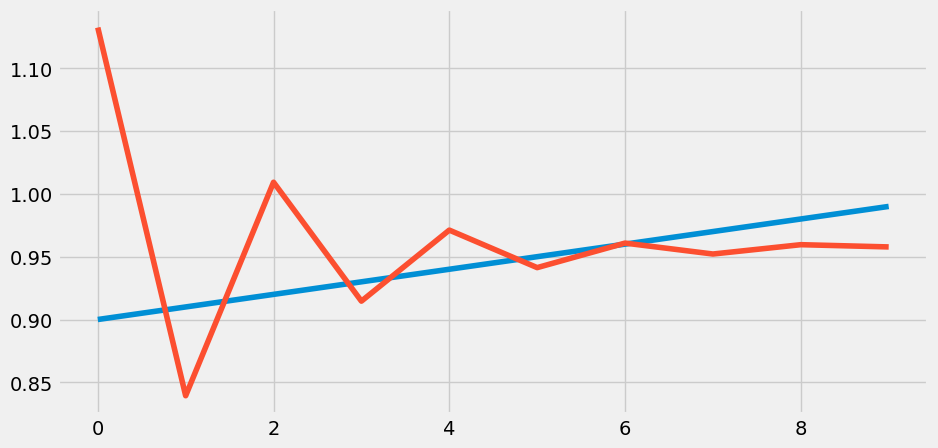

In [152]:
model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=2)
model_fit = model.fit()
model_fit.summary()
yhat = model_fit.forecast(horizon=n_test)
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
plt.plot(yhat.variance.values[-1, :])
plt.show()

Iteration:      1,   Func. Count:     33,   Neg. LLF: 138.03670836178503
Iteration:      2,   Func. Count:     70,   Neg. LLF: 2589.27259901149
Iteration:      3,   Func. Count:    103,   Neg. LLF: 113.9454665733277
Iteration:      4,   Func. Count:    136,   Neg. LLF: 86.79990949836741
Iteration:      5,   Func. Count:    169,   Neg. LLF: 43.201453850937334
Iteration:      6,   Func. Count:    202,   Neg. LLF: 37.40673871802254
Iteration:      7,   Func. Count:    235,   Neg. LLF: 57.338302422747404
Iteration:      8,   Func. Count:    268,   Neg. LLF: 36.60079471520938
Iteration:      9,   Func. Count:    301,   Neg. LLF: 35.84403004355801
Iteration:     10,   Func. Count:    334,   Neg. LLF: 35.13287665459239
Iteration:     11,   Func. Count:    367,   Neg. LLF: 33.77740074480594
Iteration:     12,   Func. Count:    399,   Neg. LLF: 33.411676252976385
Iteration:     13,   Func. Count:    431,   Neg. LLF: 33.45868182756386
Iteration:     14,   Func. Count:    464,   Neg. LLF: 33.3286

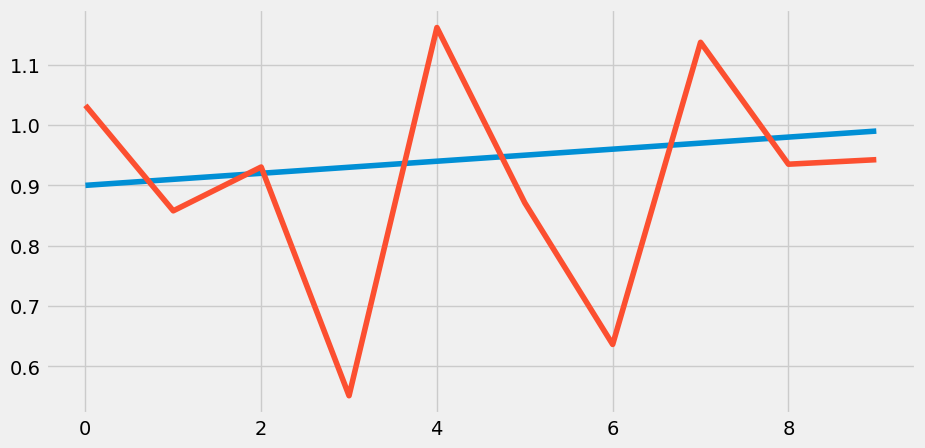

In [140]:
data = [np.random.normal(0, i*0.01) for i in range(0,100)]
n_test = 10
train, test = data[:-n_test], data[-n_test:]
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
model_fit = model.fit()
yhat = model_fit.forecast(horizon=n_test)
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
plt.plot(yhat.variance.values[-1, :])
plt.show()